# Titanic Machine Learning from Disaster Kaggle Competition
>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Description from the competiton site [homepage](https://www.kaggle.com/c/titanic).

## Goal for this notebook:
To get started with and to provide an analysis for those interested in data science or using machine learning on datasets with Python.

** This Notebook will explore the dataset using: **

### Data Wrangling
* Import data with Pandas
* Cleanup data
* Explore data with visualizations using Matplotlib

### Data Analysis
* Supervised Machine learning techniques:
    + Logistic Regression Model
    + Basic Random Forest
    + Support Vector Machine (SVM)
    + Decision Tree
    + Plotting results

* Unsupervised Machine learning techniques:
    + K-means clustering
    + Plotting results

### Evaluation of the Analysis
* K-folds cross validation to assess results on local machine

### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [Jupyter](http://jupyter.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [Matplotlib](http://matplotlib.org/)
* [PyTorch](https://pytorch.org/)

** To run this notebook interactively, get in from [here](https://github.com/lost-coders/titanic-analysis). **

In [1]:
# Enables intellisense in notebook
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Removing Columns that are not needed or have too many NaNs

In [3]:
# Cabin has more far more NaNs than actual values, so we are removing this column
train_data = train_data.drop('Cabin',axis=1)

# Not needed because this data is arbitrary
train_data = train_data.drop('Name',axis=1)

# Not needed because this data is arbitrary
train_data = train_data.drop('PassengerId',axis=1)

# Not needed because this data is arbitrary
train_data = train_data.drop('Ticket', axis=1)

train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## Lets take a look at our data graphically:

In [4]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# plots a bar graph of those who surived vs those who did not              
train_data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")

Text(0.5,1,'Distribution of Survival, (1 = Survived)')

Text(0.5,1,'Survival by Age,  (1 = Survived)')

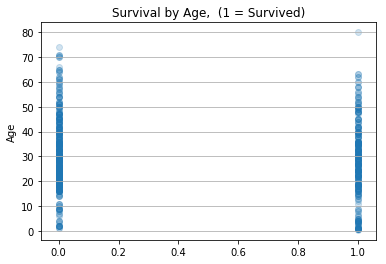

In [5]:
# plots a scatter plot for the distribution of age based on survival
plt.scatter(train_data.Survived, train_data.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

Text(0.5,1,'Class Distribution')

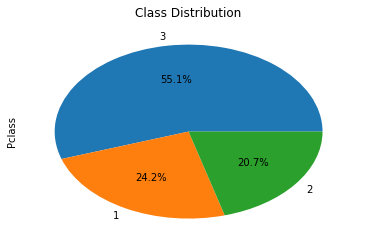

In [6]:
# plots a pie chart of the portions of people belonging to each class level
train_data.Pclass.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class Distribution")

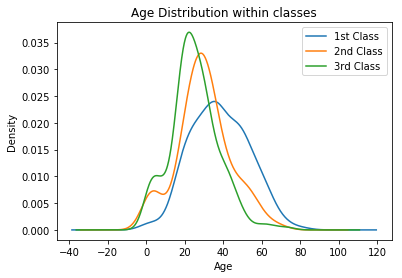

In [7]:
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_data.Age[train_data.Pclass == 1].plot(kind='kde')    
train_data.Age[train_data.Pclass == 2].plot(kind='kde')
train_data.Age[train_data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

### Passengers per boarding location:
The chart shows the amount of people that got on at each location during the Titanic's trip. 0 corresponds with Southampton, 1 corresponds with Cherbourg, and 2 corresponds with Queenstown.

Text(0.5,1,'Passengers per boarding location')

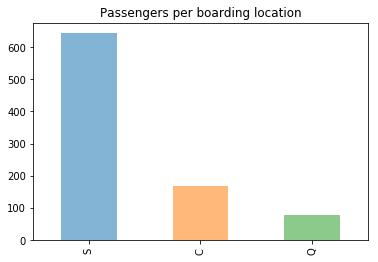

In [8]:
train_data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

## Exploratory Visualizations:
The goal of this project is to predict if an individual will survive based on the following features in the dataset:
* Sex
* Age
* Fare Price
* Travel Class (Pclass in the data)

Let's explore our data to see if we can gain a better understanding of who survived and who did not:

Text(0.5,1,'Survival Breakdown (1 = Survived, 0 = Died)')

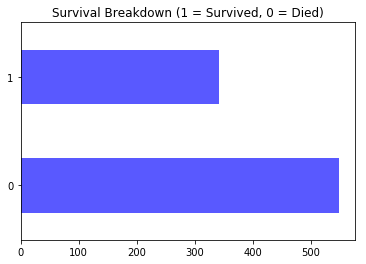

In [9]:
plt.figure(figsize=(6,4))
train_data.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Let's break the previous graph down by gender:

(-1, 2)

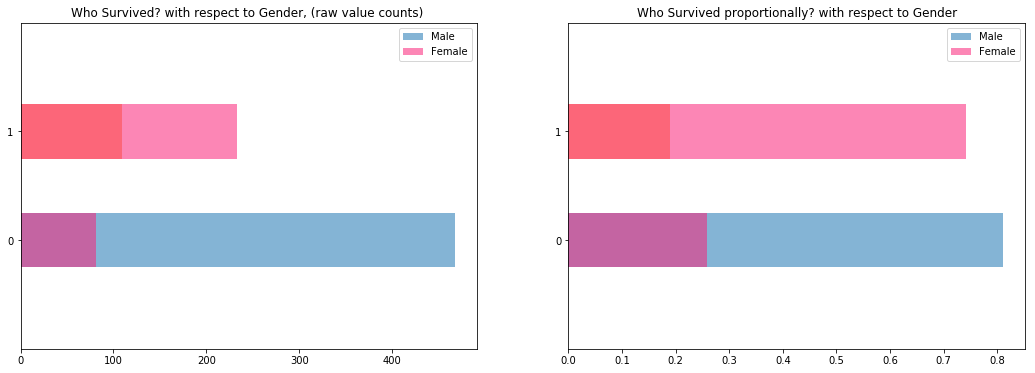

In [10]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
train_data_male = train_data.Survived[train_data.Sex == 'male'].value_counts().sort_index()
train_data_female = train_data.Survived[train_data.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
train_data_male.plot(kind='barh',label='Male', alpha=0.55)
train_data_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) ")
plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(train_data_male/float(train_data_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(train_data_female/float(train_data_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender")
plt.legend(loc='best')

ax2.set_ylim(-1, 2)

It is evident that although more men died and survived in raw value counts, females had a greater survival rate proportionally (~25%), than men (~20%).

## Since the age column doesn't have to many NaNs, we can fill it with the average age value

In [11]:
train_data['Age'].fillna((train_data['Age'].mean()), inplace=True)

## Encoding the columns with text values

In [12]:
# returning the columns with datatype of 'object'
char_cols = train_data.dtypes.pipe(lambda x: x[x=='object']).index
label_mapping = {}

# factorizing the data into discrete categories
for c in char_cols:
    train_data[c], label_mapping[c] = pd.factorize(train_data[c])
    
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,0
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,1


## Let's explore the dataset even further:
Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class (3rd class) or any of the high classes (classes 1 and 2). Let’s break it down by gender and what class they were traveling in.

In [13]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1 = fig.add_subplot(141)
female_highclass = train_data.Survived[train_data.Sex == 1][train_data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived with respect to gender and class")
plt.legend(loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass = train_data.Survived[train_data.Sex == 1][train_data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died", "Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_data.Survived[train_data.Sex == 0][train_data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class', color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train_data.Survived[train_data.Sex == 0][train_data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died", "Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

## Creating the classifier!

First, we need our input data, and our target output data. In this case, our input data will be everything that we have chosen above, minus whether or not a given person survived; the target value will be the survived column, so a single output.

In [14]:
# Contains the rest of the rows that we want to use in our classifier
train_data_x = train_data.iloc[:,1:8]

# Contains only the first column which is whether or not the person survived
train_data_y = train_data.iloc[:,0]

train_tensor = pd.DataFrame(columns=['Died','Lived'])

# iterating through our target data to create a binary classifier 
for index, row in train_data_y.iteritems():
    if row == 0:
        train_tensor.loc[index,'Died'] = 1
        train_tensor.loc[index,'Lived'] = 0
    else:
        train_tensor.loc[index,'Died'] = 0
        train_tensor.loc[index,'Lived'] = 1
train_data_x = torch.tensor(train_data_x.values)
train_data_x = train_data_x.float()

train_data_y = torch.tensor(train_tensor.values)
train_data_y = train_data_y.float()

### Using a neural network:

In [15]:
# Defining the custom neural network
class Net(nn.Module):
    def __init__(self):
        # Since we are inheriting from the class nn.Module, we need to call super to access the parent constructor
        super(Net,self).__init__()
        # creating the first fully connected layer with 7 neurons and a total of 7 edges
        self.fc1 = nn.Linear(7,7)
        
        # the first fully connected hidden layer with 7 neurons
        self.fc2 = nn.Linear(7,7)
        
        # the output layer with two neurons that represents the proablity of survival
        self.fc3 = nn.Linear(7,2)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.softmax(x,dim=0)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=7, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=2, bias=True)
)


In [16]:
# create a stochastic gradient descent optimizer
optimizer = optim.SGD(net.parameters(),lr=0.01, momentum=0.9)

#create a loss function
criterion = nn.MSELoss()

In [17]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i,inputs in enumerate(train_data_x):
        # zero the paramter gradients
        optimizer.zero_grad()

        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs,train_data_y[i])
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,   200] loss: 0.024
[1,   400] loss: 0.025
[1,   600] loss: 0.024
[1,   800] loss: 0.023
[2,   200] loss: 0.023
[2,   400] loss: 0.025
[2,   600] loss: 0.024
[2,   800] loss: 0.023
[3,   200] loss: 0.023
[3,   400] loss: 0.025
[3,   600] loss: 0.024
[3,   800] loss: 0.023
[4,   200] loss: 0.023
[4,   400] loss: 0.025
[4,   600] loss: 0.024
[4,   800] loss: 0.023
[5,   200] loss: 0.023
[5,   400] loss: 0.025
[5,   600] loss: 0.024
[5,   800] loss: 0.023
[6,   200] loss: 0.023
[6,   400] loss: 0.025
[6,   600] loss: 0.024
[6,   800] loss: 0.023
[7,   200] loss: 0.023
[7,   400] loss: 0.025
[7,   600] loss: 0.024
[7,   800] loss: 0.023
[8,   200] loss: 0.023
[8,   400] loss: 0.025
[8,   600] loss: 0.024
[8,   800] loss: 0.023
[9,   200] loss: 0.023
[9,   400] loss: 0.025
[9,   600] loss: 0.024
[9,   800] loss: 0.023
[10,   200] loss: 0.023
[10,   400] loss: 0.025
[10,   600] loss: 0.024
[10,   800] loss: 0.023
Finished Training
